In [1]:
from transformers import AutoTokenizer
from datasets import load_dataset

import os, sys
# add ..
sys.path.append("..")

import peft_comparison
import peft_comparison.text2text_utils

/home/public/vlialin/miniconda3/envs/peft_comparison/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
tokenizer = AutoTokenizer.from_pretrained("t5-base")

/home/public/vlialin/miniconda3/envs/peft_comparison/lib/python3.11/site-packages/transformers/models/t5/tokenization_t5_fast.py:158: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(


In [7]:
dataset_name = "boolq"
copa = load_dataset("super_glue", dataset_name)

raw_datasets, postprocess_fn = peft_comparison.text2text_utils.dataset_to_text2text(
    copa,
    task_type="classification",
    dataset_name=dataset_name,
    decoder_only=True,
)
# tokenize
train_dataset = raw_datasets["train"].map(
    lambda x: tokenizer(
        x["source_text"],
        truncation=True,
    ),
    batched=True,
)


Map: 100%|██████████| 9427/9427 [00:01<00:00, 6858.60 examples/s]


(array([  8.,  16.,  36.,  45.,  73.,  77., 120.,  86., 156., 174., 195.,
        198., 219., 199., 232., 243., 289., 227., 280., 243., 314., 234.,
        310., 231., 226., 274., 248., 309., 202., 295., 184., 233., 192.,
        216., 154., 166., 135., 167., 120., 156., 105., 128.,  98., 119.,
         80., 129.,  90.,  96.,  62.,  70.,  63.,  44.,  77.,  50.,  60.,
         33.,  38.,  36.,  49.,  35.,  42.,  31.,  33.,  24.,  24.,  17.,
         30.,  12.,  20.,  12.,  12.,  12.,  16.,   7.,  14.,   8.,  10.,
          5.,   6.,  12.,   6.,   8.,   8.,   8.,   4.,   7.,   3.,   6.,
          7.,   7.,   5.,   2.,   3.,   6.,   6.,   4.,   1.,   1.,   3.,
         41.]),
 array([ 64.  ,  68.48,  72.96,  77.44,  81.92,  86.4 ,  90.88,  95.36,
         99.84, 104.32, 108.8 , 113.28, 117.76, 122.24, 126.72, 131.2 ,
        135.68, 140.16, 144.64, 149.12, 153.6 , 158.08, 162.56, 167.04,
        171.52, 176.  , 180.48, 184.96, 189.44, 193.92, 198.4 , 202.88,
        207.36, 211.84, 216.32

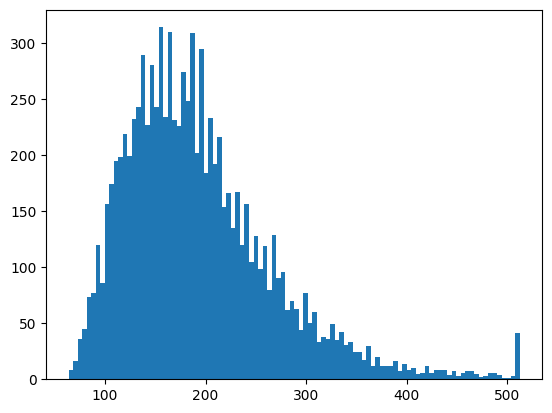

In [8]:
import matplotlib.pyplot as plt
import numpy as np

lenghts = [len(x["input_ids"]) for x in train_dataset]
plt.hist(lenghts, bins=100)

In [19]:
raw_datasets["input_ids"]

[[499,
  643,
  4061,
  3,
  9,
  8552,
  147,
  8,
  5956,
  5,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [37,
  2335,
  21533,
  26,
  160,
  1565,
  31,
  7,
  1256,
  3889,
  5,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0